импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import sys
import os
from model import create_model
import tensorflow as tf

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
device = '/cpu:0'
#device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'
#print(device)

Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.many_to_many(
    window_size,
    num_features,
    downsample_step,
    target_window_size
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = create_model(X_train, y_train,device=device)

c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [4]:
model.compile(optimizer='adam', loss='Huber',metrics = ['MAPE'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32,shuffle = True)


Epoch 1/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 104s 128ms/step - MAPE: 93.2010 - loss: 243.7497
Epoch 2/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - MAPE: 80.1801 - loss: 217.6057
Epoch 3/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 56s 125ms/step - MAPE: 69.0355 - loss: 194.2188
Epoch 4/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - MAPE: 60.8626 - loss: 172.7082
Epoch 5/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 57s 125ms/step - MAPE: 54.9368 - loss: 155.6400
Epoch 6/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 61s 135ms/step - MAPE: 50.3966 - loss: 137.2028
Epoch 7/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 59s 132ms/step - MAPE: 47.1934 - loss: 122.8151
Epoch 8/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - MAPE: 45.1759 - loss: 111.5456
Epoch 9/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 57s 126ms/step - MAPE: 44.8017 - loss: 102.5427
Epoch 10/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 57s 127ms/step - MAPE: 45.8712 - loss: 99.0945
Epoch 11/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 57s 127ms/step - MAPE: 46.9243 - loss: 95.5506
Epoch 12/30
451/451 ━━━━━━━━━━━

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,shuffle = True,initial_epoch = 11)

In [5]:
history.history['loss']

[237.15643310546875,
 212.15969848632812,
 189.05674743652344,
 168.60047912597656,
 150.2899169921875,
 133.97296142578125,
 119.95105743408203,
 109.32524871826172,
 102.09112548828125,
 97.82308197021484,
 95.49850463867188,
 94.28511047363281,
 93.65953063964844,
 93.36860656738281,
 93.24518585205078,
 93.20641326904297,
 93.19639587402344,
 93.19342803955078,
 93.19029235839844,
 93.19026947021484,
 93.19110870361328,
 93.19156646728516,
 93.19145202636719,
 93.19107818603516,
 93.19134521484375,
 93.19168090820312,
 93.19115447998047,
 93.19184112548828,
 93.19171905517578,
 93.19020080566406]

In [6]:
import torch
losses =  {
    'train_main_loss': history.history['loss'],
    'train_mape': history.history['MAPE'],
    'test_mape': history.history['MAPE'],
    'test_tube': torch.zeros(len(history.history['MAPE']))
    }

In [7]:
LV = LossVisualizer(losses)

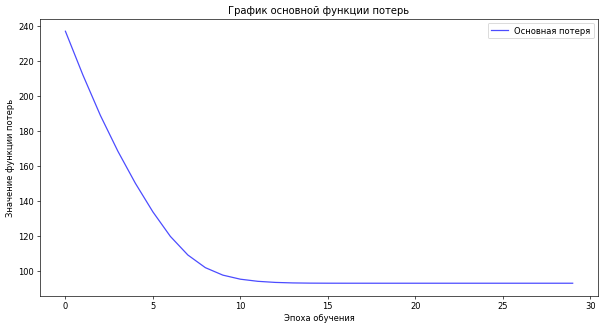

In [8]:
LV.show_training_loss()

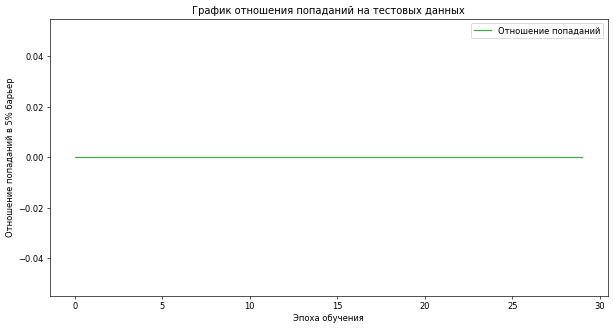

In [9]:
LV.show_test_tube()

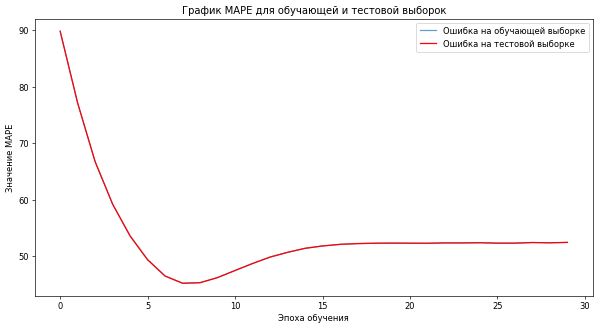

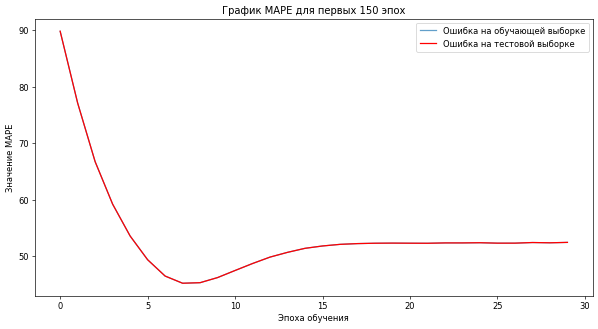

In [10]:
LV.show_mape()

222/222 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step


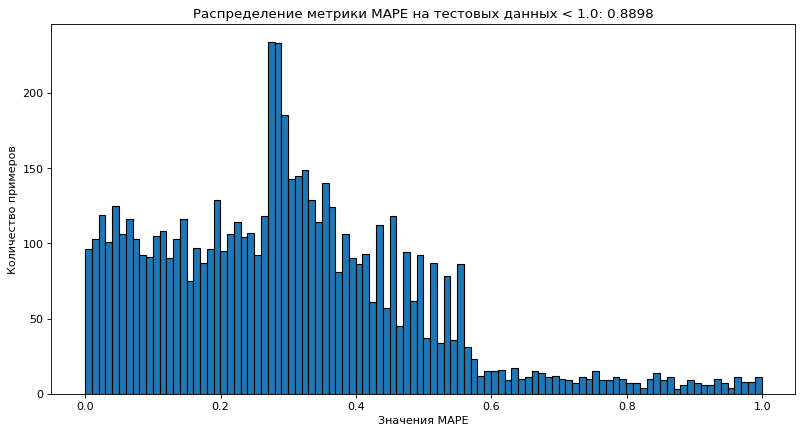

Процент значений MAPE < 1.0: 0.8898


In [11]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100,keras = True)

In [13]:
LV.show_predictions_rnn(model,df,pd_params,True)

Количество записей: 5334
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'to'